Modèle Icmp


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix,classification_report
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [5]:
df=pd.read_csv('df_pretraite.csv')

In [6]:
df.shape

(148517, 42)

In [7]:
# On définit une fonction qui retourne 0 pour un état normal et 1 s'il s'agit d'une attaque
def normal_or_not(state):
    if(state=="normal"):
        return 0
    else:
        return 1

In [8]:
df['attack-type']=df['attack-type'].apply(normal_or_not)

In [9]:
df=df[df['protocol_type']==3]

In [10]:
df.drop(['num_outbound_cmds'],axis=1,inplace=True)

<Axes: xlabel='protocol_type', ylabel='count'>

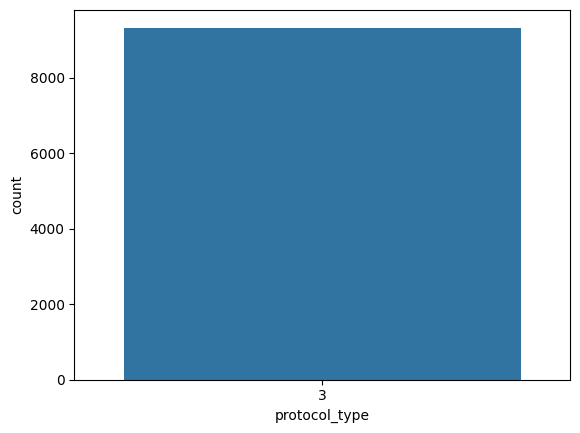

In [11]:
sns.countplot(x='protocol_type',data=df)

In [12]:
X=df.drop('attack-type',axis=1).values
y=df['attack-type'].values

In [13]:
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
X_train.shape

(7467, 40)

In [18]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
log_directory='logs\\fit'
timestamp=datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory=log_directory+'\\'+timestamp
board= TensorBoard(log_dir=log_directory,histogram_freq=1,write_graph=True, write_images=True, update_freq='epoch',profile_batch=2,embeddings_freq=1)

In [19]:
# udp
model=Sequential()
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(x=X_train,y=y_train,epochs=300, batch_size=256, validation_data=(X_test,y_test),callbacks=[early_stop,board])

Epoch 1/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3161 - loss: 0.8164 - val_accuracy: 0.8436 - val_loss: 0.6041
Epoch 2/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8273 - loss: 0.5670 - val_accuracy: 0.8436 - val_loss: 0.3983
Epoch 3/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8562 - loss: 0.3793 - val_accuracy: 0.8436 - val_loss: 0.3026
Epoch 4/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8640 - loss: 0.3019 - val_accuracy: 0.9207 - val_loss: 0.2312
Epoch 5/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9037 - loss: 0.2496 - val_accuracy: 0.9325 - val_loss: 0.1823
Epoch 6/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9241 - loss: 0.2090 - val_accuracy: 0.9314 - val_loss: 0.1545
Epoch 7/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9277 - loss: 0.1863 - val_accuracy: 0.9422 - val_loss: 0.1328
Epoch 8/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9344 - loss: 0.1660 - val_accuracy: 0.94

In [21]:
losses_icmp=pd.DataFrame(model.history.history)

In [22]:
epoch_icmp=len(losses_icmp)

<Axes: >

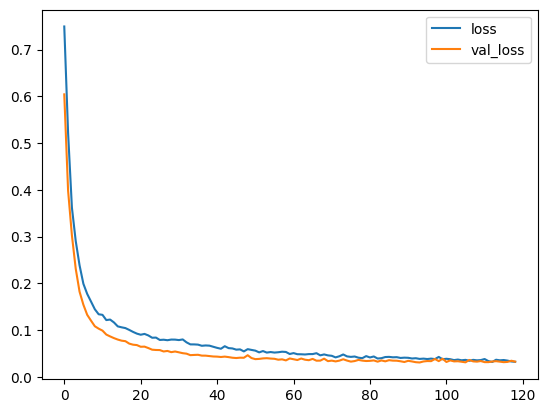

In [23]:
losses_icmp[['loss','val_loss']].plot()

<Axes: >

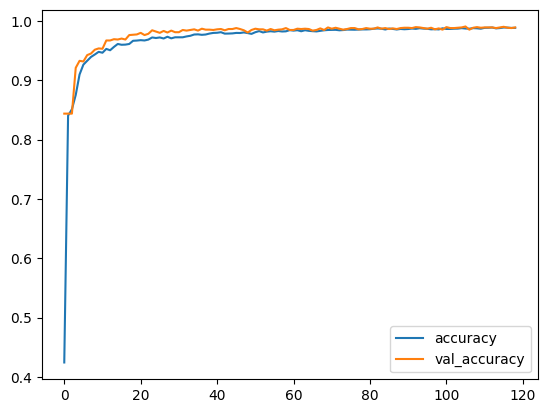

In [24]:
losses_icmp[['accuracy','val_accuracy']].plot()

In [25]:
predictions_icmp=(model.predict(X_test)>0.5).astype('int32')

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [30]:
print(classification_report(y_test,predictions_icmp))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       292
           1       1.00      0.99      0.99      1575

    accuracy                           0.99      1867
   macro avg       0.97      0.98      0.98      1867
weighted avg       0.99      0.99      0.99      1867



In [26]:
confusion_matrix(y_test,predictions_icmp)

array([[ 285,    7],
       [  14, 1561]])

In [27]:
model.save('MIcmp.h5')
model.save('MIcmp.keras')

In [28]:
from joblib import dump

In [31]:
dump(scaler,'scaler_MIcmp.pkl')

['scaler_MIcmp.pkl']